### __8) Conv network__ 


You tested above di􀁼erent models with the set of high-level features extracted from a
pretrained neural network. However, can you get similar results by creating a ConvNet
from scratch and using the pixel values from the original images to train the model?
- What accuracy can you achieve?
- Can you get good results? - If not, why?




In [1]:
import keras
from keras.datasets        import mnist
from keras.models          import Sequential
from keras.layers          import Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers          import Conv2D, MaxPooling2D
from sklearn.preprocessing import StandardScaler
from keras.utils           import plot_model
from keras import backend as K

import matplotlib.image as mpimg
import glob
import numpy            as np
import pandas           as pd
import os               as os
import tensorflow       as tf 

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt



Using TensorFlow backend.


In [2]:
data_dir = 'C:/Users/tgdreju4/OneDrive - Swisscom/EPFL/Notebooks/04ML/swissroads/'
my_dir = data_dir + 'test/'

In [3]:
# Create image generator
# rescale the image to have values between 0 and 1

train_generator = ImageDataGenerator(
                           rescale=1/255, 
                           horizontal_flip=True, 
                           rotation_range=5, 
                           validation_split=0.2)

test_generator   = ImageDataGenerator(rescale=1/255)
valid_generator  = ImageDataGenerator(rescale=1/255)

In [4]:
import os
tsize = (256,256)
# Train, validation and test sets
trainset = train_generator.flow_from_directory(data_dir + 'train', 
                                               batch_size=32, 
                                               target_size=tsize,
                                                #class_mode="sparse",
                                               shuffle=False)
validset = valid_generator.flow_from_directory(data_dir + 'valid', 
                                               batch_size=32, 
                                               target_size=tsize,
                                                #class_mode="sparse",
                                               shuffle=False)
testset = train_generator.flow_from_directory(data_dir + 'test', 
                                               batch_size=32, 
                                              target_size=tsize,
                                              #class_mode="sparse",
                                              shuffle=False)

Found 280 images belonging to 6 classes.
Found 139 images belonging to 6 classes.
Found 50 images belonging to 6 classes.


In [5]:
print('validset.class_indices: ', validset.class_indices)
print('validset.num_classes:   ', validset.num_classes)


validset.class_indices:  {'bike': 0, 'car': 1, 'motorcycle': 2, 'other': 3, 'truck': 4, 'van': 5}
validset.num_classes:    6


In [6]:
# Convolutional Network  withn Keras Model which is more convenient 
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters=32, kernel_size=5, strides=2, activation='relu', input_shape=(256, 256, 3)))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=trainset.num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 64)       

In [7]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['acc'])

# End training when accuracy stops improving (optional)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)
# Stops the fitting process when the accuracy is not increasing for more than 8 epoch.

# Train model
history = model.fit_generator(generator=trainset, validation_data=validset, epochs=100, callbacks=[early_stopping])

Epoch 1/100
9/9 [==============================] - 7s 785ms/step - loss: 1.8716 - acc: 0.0393 - val_loss: 1.8479 - val_acc: 0.2086
Epoch 2/100
9/9 [==============================] - 7s 792ms/step - loss: 1.7916 - acc: 0.1679 - val_loss: 1.8205 - val_acc: 0.2374
Epoch 3/100
9/9 [==============================] - 8s 861ms/step - loss: 1.7908 - acc: 0.2286 - val_loss: 1.8689 - val_acc: 0.2374
Epoch 4/100
9/9 [==============================] - 8s 834ms/step - loss: 1.8043 - acc: 0.2286 - val_loss: 1.9241 - val_acc: 0.2302
Epoch 5/100
9/9 [==============================] - 9s 968ms/step - loss: 1.7878 - acc: 0.2286 - val_loss: 1.8383 - val_acc: 0.2734
Epoch 6/100
9/9 [==============================] - 9s 948ms/step - loss: 1.7847 - acc: 0.2179 - val_loss: 1.8374 - val_acc: 0.2374
Epoch 7/100
9/9 [==============================] - 8s 934ms/step - loss: 1.7817 - acc: 0.2357 - val_loss: 1.8581 - val_acc: 0.2374
Epoch 8/100
9/9 [==============================] - 8s 911ms/step - loss: 1.7788 - a

Visualize the training curves

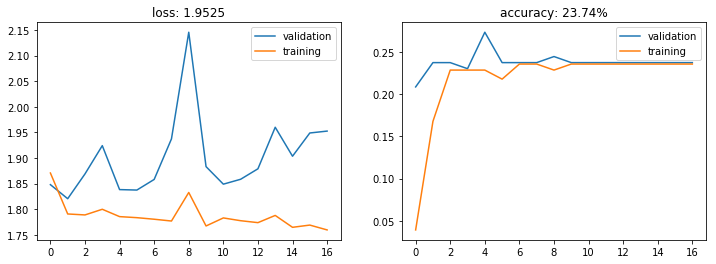

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
# Plot loss values
ax1.set_title('loss: {:.4f}'.format(history.history['val_loss'][-1]))
ax1.plot(history.history['val_loss'], label='validation')
ax1.plot(history.history['loss'], label='training')
ax1.legend()
# plot accuracy values
ax2.set_title('accuracy: {:.2f}%'.format(history.history['val_acc'][-1]*100))
ax2.plot(history.history['val_acc'], label='validation')
ax2.plot(history.history['acc'], label='training')
ax2.legend()
plt.show()

#### __Results__

> What accuracy can you achieve?
> Can you get good results? - If not, why?

> The results are not as good as the previous models and estimators. One reason is the small size of the training data. 
> Another reason is that this model is not using high-level features extracted from a pretrained convolutional neural network from TensorFlow Hub which is highly optimized by many professional engineers working on this.
> It is not possible to get better results with my own ConvNet trained with the raw pixel images. 

#### Evaulate the model on the final test data with evaluate()

In [9]:
test_accuracy = model.evaluate(testset) # with evaluate of the testset i get the loss value and accuracy
print('Test accuracy: {:.3f}'.format(test_accuracy[1]))

2/2 [==============================] - 1s 505ms/step
Test accuracy: 0.240


In [10]:
# Load the result file
df = pd.read_csv(data_dir + 'data.csv', index_col=0)

df = df.append({
'model': 'Conv network',
'test accuracy': test_accuracy[1]
},ignore_index=True)  

df.to_csv(data_dir + 'data.csv')
df

,model,test accuracy
0,knn,0.840000
1,decision tree,0.900000
2,Logistic,0.940000
3,smv linear,0.940000
4,smv rbf,0.940000
5,random forest,0.940000
6,1-layer nn,0.920863
7,2-layer nn,0.928058
8,Conv network,0.240000
